In [908]:
import pandas as pb
import warnings
warnings.filterwarnings("ignore")

In [909]:
df = pb.read_csv("C:\Machine Learning\day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


now we have to do
1. null value treatment
2. outlier treatment
3. continous to categorial and categorial to continous

In [910]:
df.isna().sum()  ## Checks for a null value

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [911]:
## Outlier treatment can be done by ploting a box plot

import seaborn as sns
import matplotlib.pyplot as plt 

<Axes: >

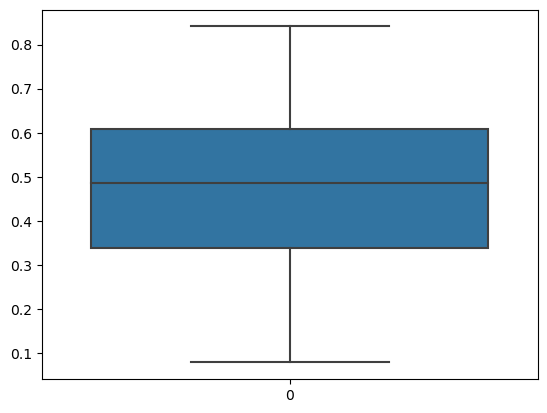

In [912]:
sns.boxplot(df.atemp)

{'whiskers': [<matplotlib.lines.Line2D at 0x113bd69cf50>,
 'caps': [<matplotlib.lines.Line2D at 0x113bd69e010>,
 'boxes': [<matplotlib.lines.Line2D at 0x113bd691090>],
 'medians': [<matplotlib.lines.Line2D at 0x113bd69f250>],
 'fliers': [<matplotlib.lines.Line2D at 0x113bd69f890>],
 'means': []}

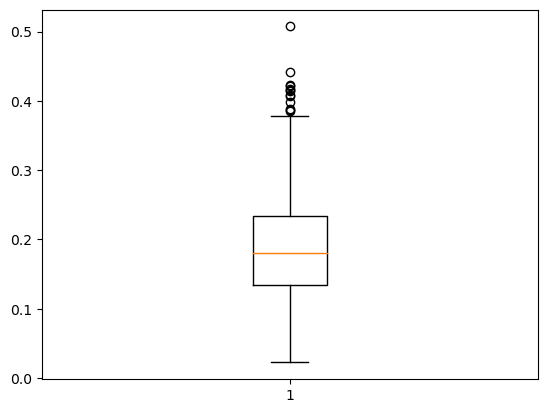

In [913]:
plt.boxplot(df.windspeed)

In [914]:
df[df.windspeed > 0.5]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635


In [915]:
df1 = pb.read_csv("./hour.csv")

In [916]:
df1.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


weathersit : 

		1: Clear, Few clouds, Partly cloudy, Partly cloudy
		
		2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		
		3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		
		4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [917]:
weat = {1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
        2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
        3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
        4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"}

df.weathersit = df.weathersit.apply(lambda x: weat[x])
df1.weathersit = df1.weathersit.apply(lambda x: weat[x])


In [918]:
df1

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2727,0.56,0.1343,13,48,61


In [919]:
days = {0: "sunday", 1: "monday",2: "tuesday", 3: "wednesday",4: "thrusday", 5: "firday",6: "saturday"}
df.weekday = df.weekday.apply(lambda x : days[x])
df1.weekday = df1.weekday.apply(lambda x: days[x])

In [920]:
df1

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,monday,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,monday,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2727,0.56,0.1343,13,48,61


In [921]:
seas = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
df.season = df.season.apply(lambda x: seas[x])
df1.season = df1.season.apply(lambda x: seas[x])

In [922]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [923]:
##df1.head()

In [924]:
## this makes a new df consisting of only numeric cols so there are no errors in df.corr()
numeric_df = df.select_dtypes(include=[float, int])

<Axes: >

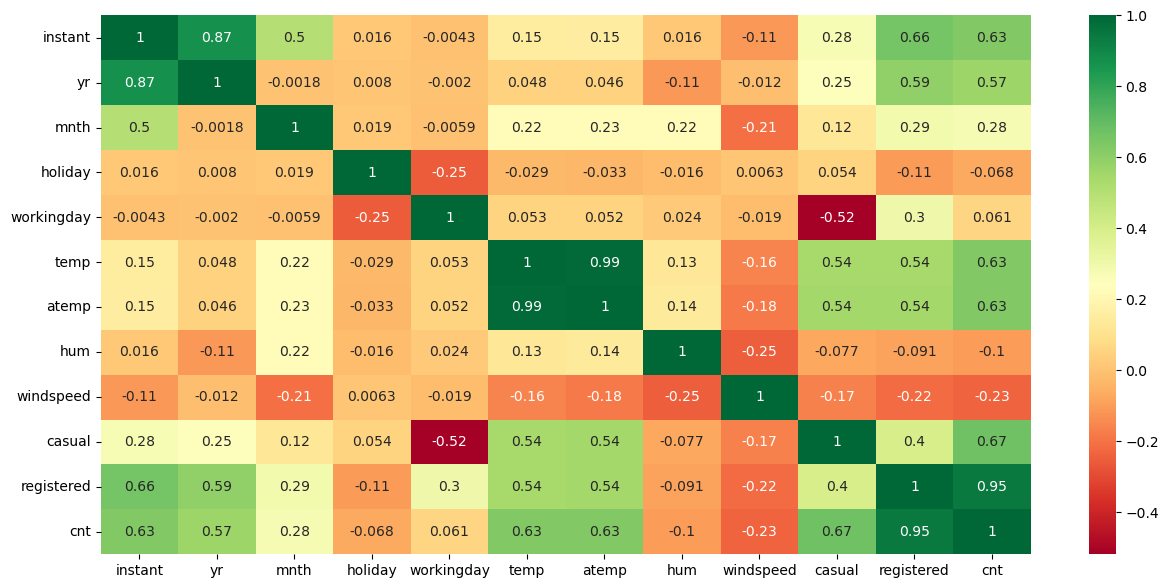

In [925]:
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_df.corr(), annot= True, cmap="RdYlGn")

In [926]:
##sns.pairplot(data=df)

In [927]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


From here, encoding starts

In [928]:
df= pb.concat([df, pb.get_dummies(df.season, drop_first=True)], axis=1)
df.drop(columns="season", inplace=True)

In [929]:
df = pb.concat([df, pb.get_dummies(df.weekday, drop_first=True)], axis=1)
df.drop(columns="weekday", inplace=True)

In [930]:
df = pb.concat([df, pb.get_dummies(df.weathersit)], axis=1)
df.drop(columns="weathersit", inplace=True)

In [931]:
mnt = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec", }
df.mnth = df.mnth.apply(lambda x: mnt[x])

In [932]:
df =  pb.concat([df, pb.get_dummies(df.mnth, drop_first=True)], axis=1)
df.drop(columns="mnth", inplace=True)

In [933]:
df[df.select_dtypes(include=['bool']).columns] = df.select_dtypes(include=['bool']).astype(int)

In [934]:
df.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,2011-01-01,0,0,0,0.344167,0.363625,0.805833,0.160446,331,...,0,0,1,0,0,0,0,0,0,0
1,2,2011-01-02,0,0,0,0.363478,0.353739,0.696087,0.248539,131,...,0,0,1,0,0,0,0,0,0,0
2,3,2011-01-03,0,0,1,0.196364,0.189405,0.437273,0.248309,120,...,0,0,1,0,0,0,0,0,0,0
3,4,2011-01-04,0,0,1,0.200000,0.212122,0.590435,0.160296,108,...,0,0,1,0,0,0,0,0,0,0
4,5,2011-01-05,0,0,1,0.226957,0.229270,0.436957,0.186900,82,...,0,0,1,0,0,0,0,0,0,0


In [935]:
from sklearn.model_selection import train_test_split
import sklearn as sks
import statsmodels.api as sm
from statsmodels.api import add_constant
from statsmodels.api import regression
from sklearn.preprocessing import MinMaxScaler

In [936]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf

In [937]:
from sklearn.metrics import r2_score

In [938]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=45)

In [939]:
col = df_train.columns

In [940]:
y_train = df_train.pop("cnt")
col = df_train.columns

In [941]:
X_train = df_train
X_train_sm = sm.add_constant(X_train)

In [942]:
y_train = y_train.values

In [943]:
X_train_sm.drop(columns="dteday", inplace=True)
df_test.drop(columns="dteday", inplace=True)

In [944]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.591e+30
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        05:28:22   Log-Likelihood:                 14360.
No. Observations:                 584   AIC:                        -2.866e+04
Df Residuals:                     552   BIC:                        -2.852e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                   -7.049e-12   2.39e-12     -2.950      0.003   -1.17e-11   -2.35e-12
instant                                                                                  1.421e-14   2.48e-14      0.572      0.567   -3.46e-14     6.3e-14
yr                                                                                               0   9.18e-12          0      1.000    -1.8e-11     1.8e-11
holiday                                                                                 -2.956e-12   1.23e-12     -2.396      0.017   -5.38e-12   -5.32e-13
workingday                                                                              -1.819e-12   9.02e-13     -2.016      0.044   -3.59e-12   -4.67e-14
temp                                                                                     3.638e-12   9.97e-12      0.365      0.715   -1.59e-11    2.32e-11
atemp                                                                                    6.366e-12   1.03e-11      0.617      0.537   -1.39e-11    2.66e-11
hum                                                                                     -3.524e-12   2.26e-12     -1.556      0.120   -7.97e-12    9.25e-13
windspeed                                                                                -3.07e-12   3.17e-12     -0.969      0.333   -9.29e-12    3.15e-12
casual                                                                                      1.0000   6.63e-16   1.51e+15      0.000       1.000       1.000
registered                                                                                  1.0000    3.8e-16   2.63e+15      0.000       1.000       1.000
spring                                                                                   2.274e-13   1.63e-12      0.139      0.889   -2.98e-12    3.44e-12
summer                                                                                   1.535e-12   1.39e-12      1.101      0.271    -1.2e-12    4.27e-12
winter                                                                                  -5.684e-14   1.47e-12     -0.039      0.969   -2.94e-12    2.83e-12
monday                                                                                   1.023e-12   8.45e-13      1.211      0.227   -6.37e-13    2.68e-12
saturday                                                                                -7.958e-13   8.68e-13     -0.917      0.360    -2.5e-12    9.09e-13
sunday                                                                                  -1.251e-12   8.66e-13     -1.44

In [945]:
vif = pb.DataFrame()
vif["features"] = X_train_sm.columns
vif["VIF"] = [vf(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]

In [946]:
vif
## all that have high variance factor are bad so we remove highest ones and other gets adjusted by itself

,features,VIF
0,const,0.000000
1,instant,596.456056
2,yr,452.761754
3,holiday,inf
4,workingday,inf
5,temp,73.038716
6,atemp,61.790756
7,hum,2.192500
8,windspeed,1.321145
9,casual,4.026853


In [947]:
vif[vif["VIF"] > 5]
## first remove the cols with maximum p values and then columns with maximum vif and other columns vif will automatically decrease

,features,VIF
1,instant,596.456056
2,yr,452.761754
3,holiday,inf
4,workingday,inf
5,temp,73.038716
6,atemp,61.790756
10,registered,7.732656
11,spring,10.693840
12,summer,7.639907
13,winter,8.730801


In [948]:
col = list(col)

In [949]:
col.remove("Dec")

In [950]:
col.remove("dteday")

In [951]:
X_train_sm = sm.add_constant(X_train[col])

In [952]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.667e+31
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        05:28:23   Log-Likelihood:                 14893.
No. Observations:                 584   AIC:                        -2.972e+04
Df Residuals:                     553   BIC:                        -2.959e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                   -3.297e-12   8.02e-13     -4.113      0.000   -4.87e-12   -1.72e-12
instant                                                                                  6.495e-15   2.91e-15      2.233      0.026    7.82e-16    1.22e-14
yr                                                                                      -1.648e-12   1.14e-12     -1.441      0.150    -3.9e-12    5.99e-13
holiday                                                                                 -2.274e-12   4.83e-13     -4.710      0.000   -3.22e-12   -1.33e-12
workingday                                                                              -9.663e-13   3.32e-13     -2.913      0.004   -1.62e-12   -3.15e-13
temp                                                                                     1.819e-12   3.98e-12      0.457      0.648      -6e-12    9.64e-12
atemp                                                                                    9.095e-12   4.13e-12      2.204      0.028    9.88e-13    1.72e-11
hum                                                                                     -9.095e-13   9.07e-13     -1.002      0.317   -2.69e-12    8.73e-13
windspeed                                                                               -9.095e-13   1.27e-12     -0.717      0.474    -3.4e-12    1.58e-12
casual                                                                                      1.0000   2.66e-16   3.77e+15      0.000       1.000       1.000
registered                                                                                  1.0000   1.52e-16   6.58e+15      0.000       1.000       1.000
spring                                                                                   1.137e-12   6.54e-13      1.740      0.082   -1.47e-13    2.42e-12
summer                                                                                   1.648e-12   5.55e-13      2.971      0.003    5.59e-13    2.74e-12
winter                                                                                    1.99e-12   5.83e-13      3.414      0.001    8.45e-13    3.13e-12
monday                                                                                   3.979e-13   3.39e-13      1.175      0.241   -2.67e-13    1.06e-12
saturday                                                                                -2.274e-13   3.21e-13     -0.708      0.479   -8.58e-13    4.04e-13
sunday                                                                                  -9.663e-13   3.18e-13     -3.03

In [953]:
vif = pb.DataFrame()
vif["features"] = X_train_sm.columns
vif["VIF"] = [vf(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]

In [954]:
vif
## vif of every other coln dropped significantly
##
## a cat is not a dog 
## a tiger is not a dog        irrelevent
## a tiger is a cat

## if i remove the first line then the second line becomes more relevent.
## its same as that


## ORDER OF REMOVAL OF ROWS
## 1st always higher P(E) probablity of error
## 2nd higher vif

,features,VIF
0,const,0.000000
1,instant,50.927492
2,yr,43.752992
3,holiday,inf
4,workingday,inf
5,temp,72.517935
6,atemp,61.627788
7,hum,2.190797
8,windspeed,1.319540
9,casual,4.026848
